In [1]:
using CSV
using Dates
using DataFrames
using Gadfly

In [2]:
ENV["COLUMNS"] = 1000;

In [3]:
data = DataFrame(CSV.File("../data/data_forecast.csv"))
data

,date,hospital,hospital_id,admissions_allbeds,admissions_acute,admissions_icu
,Date,String,String,Float64,Float64,Float64
1,2021-01-01,Anne Arundel Medical Center,h39740093,13.3226,9.32581,3.99677
2,2021-01-02,Anne Arundel Medical Center,h39740093,13.6452,9.55161,4.09355
3,2021-01-03,Anne Arundel Medical Center,h39740093,15.1935,10.6355,4.55806
4,2021-01-04,Anne Arundel Medical Center,h39740093,13.871,9.70968,4.16129
5,2021-01-05,Anne Arundel Medical Center,h39740093,12.8387,8.9871,3.85161
6,2021-01-06,Anne Arundel Medical Center,h39740093,12.3226,8.62581,3.69677
7,2021-01-07,Anne Arundel Medical Center,h39740093,12.9677,9.07742,3.89032
8,2021-01-08,Anne Arundel Medical Center,h39740093,13.1613,9.2129,3.94839
9,2021-01-09,Anne Arundel Medical Center,h39740093,12.3548,8.64839,3.70645


In [4]:
mean(xs) = sum(xs) / length(xs);

In [5]:
isbad(x) = isnothing(x) || ismissing(x) || isinf(x) || isnan(x);
skipbad(xs) = filter(x -> !isbad(x), xs);

In [6]:
sum_vals(xs) = sum(skipbad(xs));
mean_vals(xs) = mean(skipbad(xs));

In [7]:
data_total = combine(groupby(data, :date), [
    :admissions_allbeds => sum_vals => :admissions_allbeds,
    :admissions_acute => sum_vals => :admissions_acute,
    :admissions_icu => sum_vals => :admissions_icu,
]);

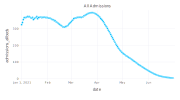

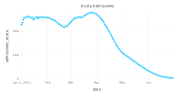

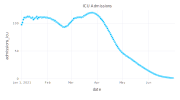

In [8]:
plot(
    data_total,
    x = :date,
    y = :admissions_allbeds,
    Geom.point, Geom.line,
    Guide.title("All Admissions"),
    Coord.cartesian(ymin=0),
    Scale.y_continuous(format=:plain),
) |> SVG(18cm, 10cm)

plot(
    data_total,
    x = :date,
    y = :admissions_acute,
    Geom.point, Geom.line,
    Guide.title("Acute Admissions"),
    Coord.cartesian(ymin=0),
    Scale.y_continuous(format=:plain),
) |> SVG(18cm, 10cm)

plot(
    data_total,
    x = :date,
    y = :admissions_icu,
    Guide.title("ICU Admissions"),
    Geom.point, Geom.line,
    Coord.cartesian(ymin=0),
    Scale.y_continuous(format=:plain),
) |> SVG(18cm, 10cm)